In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import plotly_express as px

In [39]:
df = pd.read_csv('data/Dataset MeriSKILL.zip', compression='zip', parse_dates=['Order Date'])
pd.set_option("display.max_columns", None)
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [40]:
df.drop(columns=["Unnamed: 0", "Order ID"], inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  object        
 1   Quantity Ordered  185950 non-null  int64         
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
 5   Month             185950 non-null  int64         
 6   Sales             185950 non-null  float64       
 7   City              185950 non-null  object        
 8   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 12.8+ MB


In [42]:
df.tail()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
185945,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18
185949,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",6,2.99,Atlanta,14


In [46]:
for column in df.columns:
    dup = df[column].duplicated().sum()
    print(f"{column} : {dup}")

Product : 185931
Quantity Ordered : 185941
Price Each : 185933
Order Date : 43555
Purchase Address : 45163
Month : 185938
Sales : 185897
City : 185941
Hour : 185926


In [52]:
month = df.groupby("Month").sum(["Quantity Ordered", "Price Each"]).mean("Sales").reset_index()
month.head()

ValueError: No axis named Sales for object type DataFrame

In [50]:
for column in month.columns:
    dup = month[column].duplicated().sum()
    print(f"{column} : {dup}")

Month : 0
Quantity Ordered : 0
Price Each : 0
Sales : 0
Hour : 0


In [54]:
fig = px.line(month, x = "Month", y = "Sales", title="sales")
fig.show()

<Axes: ylabel='City'>

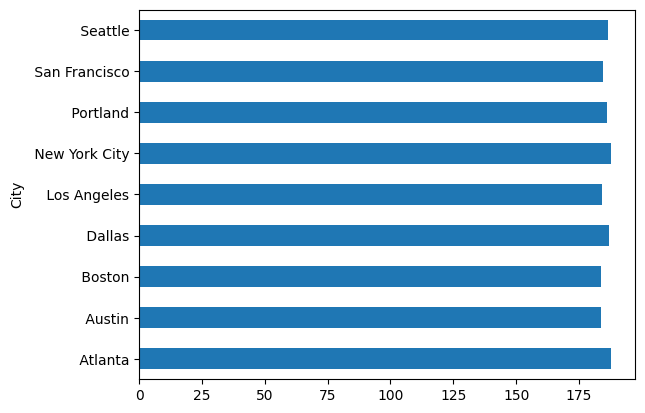

In [60]:
df.groupby("City")["Sales"].mean().plot(kind="barh")

In [68]:
# Calculate the mean sales per city
mean_sales = df.groupby("City")["Sales"].mean().reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(mean_sales, x="Sales", y="City", orientation="h", title="Mean Sales per City")
fig.show()



In [69]:
mean_sales.head()

,City,Sales
0,Atlanta,187.856903
1,Austin,183.703357
2,Boston,183.688272
3,Dallas,186.772969
4,Los Angeles,184.177362


In [70]:
quantity = df.groupby("City")["Quantity Ordered"].sum().reset_index()
fig = px.bar(quantity, x="Quantity Ordered", y="City", orientation="h", title="Quantity Ordered per City")
fig.show()


In [71]:
quantity

,City,Quantity Ordered
0,Atlanta,16602
1,Austin,11153
2,Boston,22528
3,Dallas,16730
4,Los Angeles,33289
5,New York City,27932
6,Portland,14053
7,San Francisco,50239
8,Seattle,16553
